## Simple Classification Tree with Time Series Data

A classification tree works just like the regression version, except that categorical nature of the outcome requires a different approach to making predictions and measuring the loss. While a regression tree predicts the response for an observation assigned to a leaf node using the mean outcome of the associated training samples, a classification tree instead uses the mode, that is, the most common class among the training samples in the relevant region. A classification tree can also generate probabilistic predictions based on relative class frequencies.

### Loss Functions

When growing a classification tree, we also use recursive binary splitting but, instead of evaluating the quality of a decision rule using the reduction of the mean-squared error, we can use the classification error rate, which is simply the fraction of the training samples in a given (leave) node that do not belong to the most common class.

However, the alternative measures, Gini Index or Cross-Entropy, are preferred because they are more sensitive to node purity than the classification error rate. Node purity refers to the extent of the preponderance of a single class in a node. A node that only contains samples with outcomes belonging to a single class is pure and imply successful classification for this particular region of the feature space. 

In [1]:
def entropy(x):
    return (-x*np.log2(x) - (1-x)*np.log2(1-x))/2

In [2]:
def gini(x):
    return 2*x*(1-x)

In [3]:
def error_rate(x):
    return np.where(x<=.5, x, 1-x)

Both the Gini Impurity and the Cross-Entropy measure take on smaller values when the class proportions approach zero or one, that is, when the child nodes become pure as a result of the split and are highest when the class proportions are even or 0.5 in the binary case. 

The chart below visualizes the values assumed by these two measures and the misclassification error rates across the [0, 1] interval of proportions.

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

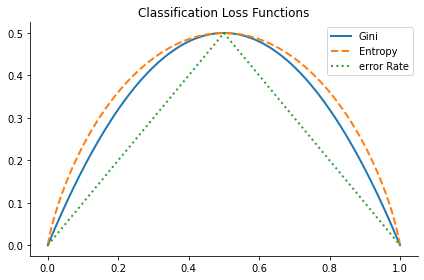

In [6]:
x = np.linspace(0, 1, 10000)
(pd.DataFrame({'Gini': gini(x), 
              'Entropy': entropy(x),
             'error Rate': error_rate(x)}, index=x)
 .plot(title='Classification Loss Functions', lw=2, style=['-', '--', ':']))
sns.despine()
plt.tight_layout();

#### Compare computation time

Gini is often preferred over entropy because it computes faster:

In [7]:
%%timeit
error_rate(x)

20.2 µs ± 1.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [8]:
%%timeit
gini(x)

11.6 µs ± 67.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [9]:
%%timeit
entropy(x)

204 µs ± 2.54 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
